In [1]:
import numpy as np
import wave
from matplotlib import pylab as plt
import struct

In [2]:
N = 1  # 高調波の数
a = 1 / N  # 振幅
Fs = 44100  # サンプリング周波数
F0 = 440  # 周波数
seconds = 3  # 秒
t = np.arange(0.0, seconds, 1 / Fs)  # サンプリングした時の時間軸

In [3]:
# グラフを描画
def plot_wav(wave_data,t):
    scale = 0.01  # 描画範囲の設定(s)
    q = int(scale*Fs)
    plt.plot(t[0:q], wave_data[0:q])
    plt.show()

In [4]:
def create_wave(file_name,wave_data,fs):
    #16bit符号付き整数に変換
    wave_data = [int(x * 32767.0) for x in wave_data]

    #バイナリ化
    binwave = struct.pack("h" * len(wave_data), *wave_data)

    #wavファイルとして書き出し
    wf = wave.Wave_write(file_name)
    wf.setparams((1, 2, fs, len(wave_data), "NONE", "not compressed"))
    wf.writeframes(binwave)
    wf.close()

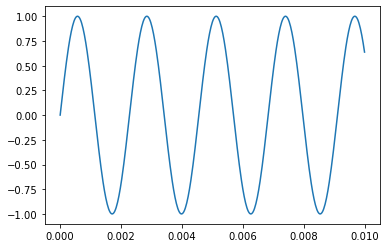

In [5]:
#正弦波
sin_wave = a * np.sin(2 * np.pi * F0 * t)
plot_wav(sin_wave, t)
create_wave('sin_wave.wav', sin_wave, Fs)

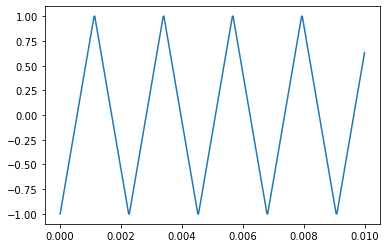

In [6]:
# 三角波
triangle_wave = np.array([0.0 for i in range(len(t))])
filtersize = Fs // F0 //2
triangle_filter = np.arange(0, filtersize)[:] / (filtersize-1)

for i in range(len(t) // filtersize):
    for j in range(filtersize):
        index_num = i * filtersize + j
        if i%2 == 0:
            triangle_wave[index_num] = triangle_filter[j]
        else:
            triangle_wave[index_num] = triangle_filter[j*(-1)-1]
triangle_wave[:] -= 0.5
triangle_wave[:] *= 2

plot_wav(triangle_wave, t)
create_wave('triangle_wave.wav', triangle_wave, Fs)

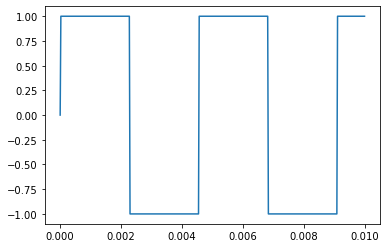

In [7]:
#矩形波
square_wave = np.array([0.0 for i in range(len(t))])
for i in range(len(t)):
    if np.sin(np.pi * F0 * t[i]) > 0:
        square_wave[i] = 1 * a
    elif np.sin(np.pi * F0 * t[i]) == 0:
        square_wave[i] = 0 * a
    elif np.sin(np.pi * F0 * t[i]) < 0:
        square_wave[i] =- (1 * a)
        
plot_wav(square_wave, t)
create_wave('square_wave.wav',square_wave, Fs)

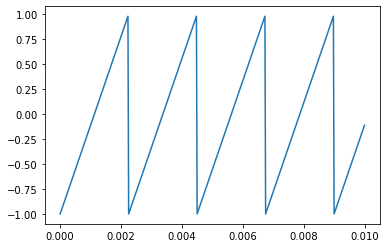

In [8]:
#のこぎり波
sawtooth_wave = np.arange(0,len(t))
for i in range(len(t)):
    sawtooth_wave[i] = i%((Fs//F0)-1)
sawtooth_wave = sawtooth_wave[:] / ((Fs//F0)-1) - 0.5
sawtooth_wave = sawtooth_wave[:] * 2

plot_wav(sawtooth_wave, t)
create_wave('sawtooth_wave.wav', sawtooth_wave, Fs)